In [80]:
library(dplyr)
library(ggplot2)

В цій лабораторній роботі ми продовжуємо працювати з
лінійною регресією та трактуванням результатів отриманих
моделей.
Будемо використовувати два набори даних: квартет Анскомбе
anscombe (згенерований у 1973 Frensis Anscombe) та diamonds
(містить інформацію про ціну та характеристики 53940
діамантів).
Почнемо з дослідження набору даних anscombe. На цьому
наборі даних проілюструємо процес діагностики моделі
лінійної регресії. Це вбудований R датасет, тому завантажити
його додатково не потрібно. Дослідимо структуру наших даних:

In [3]:
anscombe

x1,x2,x3,x4,y1,y2,y3,y4
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10,10,10,8,8.04,9.14,7.46,6.58
8,8,8,8,6.95,8.14,6.77,5.76
13,13,13,8,7.58,8.74,12.74,7.71
9,9,9,8,8.81,8.77,7.11,8.84
11,11,11,8,8.33,9.26,7.81,8.47
14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,8,7.24,6.13,6.08,5.25
4,4,4,19,4.26,3.10,5.39,12.50
12,12,12,8,10.84,9.13,8.15,5.56


Квартет Анскомба (Anscombe's quartet):

Це набір з чотирьох наборів даних, створених статистиком Френсісом Анскомбом у 1973 році.
Вони мають майже ідентичні прості статистичні властивості (середнє значення, дисперсія, кореляція, лінійна регресія), але сильно відрізняються при графічному відображенні.
Квартет Анскомба використовується для демонстрації важливості графічного аналізу даних перед проведенням статистичного аналізу.
Він показує, що статистичні показники можуть ввести в оману, якщо не візуалізувати дані.

In [5]:
str(anscombe)

'data.frame':	11 obs. of  8 variables:
 $ x1: num  10 8 13 9 11 14 6 4 12 7 ...
 $ x2: num  10 8 13 9 11 14 6 4 12 7 ...
 $ x3: num  10 8 13 9 11 14 6 4 12 7 ...
 $ x4: num  8 8 8 8 8 8 8 19 8 8 ...
 $ y1: num  8.04 6.95 7.58 8.81 8.33 ...
 $ y2: num  9.14 8.14 8.74 8.77 9.26 8.1 6.13 3.1 9.13 7.26 ...
 $ y3: num  7.46 6.77 12.74 7.11 7.81 ...
 $ y4: num  6.58 5.76 7.71 8.84 8.47 7.04 5.25 12.5 5.56 7.91 ...


In [7]:
summary(anscombe)

       x1             x2             x3             x4           y1        
 Min.   : 4.0   Min.   : 4.0   Min.   : 4.0   Min.   : 8   Min.   : 4.260  
 1st Qu.: 6.5   1st Qu.: 6.5   1st Qu.: 6.5   1st Qu.: 8   1st Qu.: 6.315  
 Median : 9.0   Median : 9.0   Median : 9.0   Median : 8   Median : 7.580  
 Mean   : 9.0   Mean   : 9.0   Mean   : 9.0   Mean   : 9   Mean   : 7.501  
 3rd Qu.:11.5   3rd Qu.:11.5   3rd Qu.:11.5   3rd Qu.: 8   3rd Qu.: 8.570  
 Max.   :14.0   Max.   :14.0   Max.   :14.0   Max.   :19   Max.   :10.840  
       y2              y3              y4        
 Min.   :3.100   Min.   : 5.39   Min.   : 5.250  
 1st Qu.:6.695   1st Qu.: 6.25   1st Qu.: 6.170  
 Median :8.140   Median : 7.11   Median : 7.040  
 Mean   :7.501   Mean   : 7.50   Mean   : 7.501  
 3rd Qu.:8.950   3rd Qu.: 7.98   3rd Qu.: 8.190  
 Max.   :9.260   Max.   :12.74   Max.   :12.500  

Це чотири набори даних (x1, y1), (x2, y2), (x3, y3), (x4, y4)

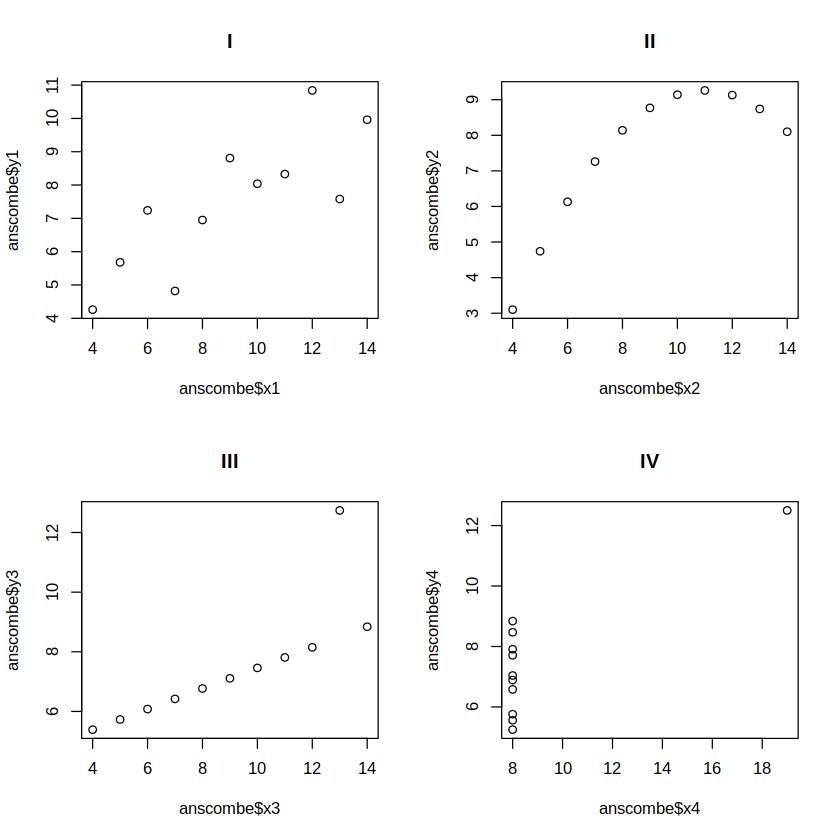

In [10]:
par(mfrow=c(2,2))  # Розбиваємо графічне вікно на 2x2 панелі
plot(anscombe$x1, anscombe$y1, main = "I")
plot(anscombe$x2, anscombe$y2, main = "II")
plot(anscombe$x3, anscombe$y3, main = "III")
plot(anscombe$x4, anscombe$y4, main = "IV")

Ці набори мають однаковий коефіцієнт кореляції. Обчисліть
його та вкажіть у якості відповіді на питання

In [13]:
# Обчислимо та перевіримо:
cor(anscombe$x1,anscombe$y1)

[1] 0.8164205

In [15]:
# Для іншого набору даних
cor(anscombe$x4,anscombe$y4)

[1] 0.8165214

Та однакову лінію моделі лінійної регресії. Знайдіть лінію
регресії з допомогою команд lm та summary Вкажіть рівняння
цієї лінії у якості відповіді на питання

In [18]:
lm1 <- lm(data = anscombe, y1 ~ x1)

In [20]:
summary(lm1)


Call:
lm(formula = y1 ~ x1, data = anscombe)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.92127 -0.45577 -0.04136  0.70941  1.83882 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   3.0001     1.1247   2.667  0.02573 * 
x1            0.5001     0.1179   4.241  0.00217 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.237 on 9 degrees of freedom
Multiple R-squared:  0.6665,	Adjusted R-squared:  0.6295 
F-statistic: 17.99 on 1 and 9 DF,  p-value: 0.00217


Маємо лінію регресії: ŷ=0.5x+3

Давайте проведемо діагностику лінійних моделей для (x1, y1),
(x2, y2), (x3, y3), (x4, y4) відповідно. З графіка очевидно, що для
наборів (x2, y2) та (x4, y4) порушена умова лінійності. У
випадку (x2, y2) - є нелійна залежність. Для набору (x3, y3)
умова лінійності буде виконуватись при видаленні нетипових
значень(outliers), при цьому зміниться рівняння лінії лінійної
регресії.
Аналіз залишків будемо проводити для всіх моделей (з метою
зрозуміти, як буде виглядати розподіл та варіативність
залишків при порушеннях умов лінійності).
Почнемо з набору (x1, y1).
Нехай модель задана рівнянням lm1 <- lm(data = anscombe, y1 ~
x1). Для діагностики моделі нам потрібно оцінити розподіл
залишків.
Залишок - це різниця між реальними даними(в нашому
випадку це y1) та даними y^, для x1 згідно нашої моделі.
Знайдемо значення y^(fitted.values) згідно нашого рівняння
лінійної регресії.

In [24]:
lm1$fitted.values

1         2         3         4         5         6         7         8 
 8.001000  7.000818  9.501273  7.500909  8.501091 10.001364  6.000636  5.000455 
        9        10        11 
 9.001182  6.500727  5.500545

In [26]:
# Знайдемо залишки. Це можна зробити віднявши fitted.values від реальних значень y1:
anscombe$y1 - lm1$fitted.values

1           2           3           4           5           6 
 0.03900000 -0.05081818 -1.92127273  1.30909091 -0.17109091 -0.04136364 
          7           8           9          10          11 
 1.23936364 -0.74045455  1.83881818 -1.68072727  0.17945455

In [28]:
#Або використати параметр residuals (залишки)
lm1$residuals

1           2           3           4           5           6 
 0.03900000 -0.05081818 -1.92127273  1.30909091 -0.17109091 -0.04136364 
          7           8           9          10          11 
 1.23936364 -0.74045455  1.83881818 -1.68072727  0.17945455

In [30]:
lm2 <- lm(data = anscombe, y2 ~ x2)

In [32]:
summary(lm2)


Call:
lm(formula = y2 ~ x2, data = anscombe)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9009 -0.7609  0.1291  0.9491  1.2691 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)    3.001      1.125   2.667  0.02576 * 
x2             0.500      0.118   4.239  0.00218 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.237 on 9 degrees of freedom
Multiple R-squared:  0.6662,	Adjusted R-squared:  0.6292 
F-statistic: 17.97 on 1 and 9 DF,  p-value: 0.002179


In [34]:
lm2$residuals

1          2          3          4          5          6          7 
 1.1390909  1.1390909 -0.7609091  1.2690909  0.7590909 -1.9009091  0.1290909 
         8          9         10         11 
-1.9009091  0.1290909  0.7590909 -0.7609091

In [36]:
lm3 <- lm(data = anscombe, y3 ~ x3)

In [38]:
lm3$residuals

1           2           3           4           5           6 
-0.53972727 -0.23027273  3.24109091 -0.39000000 -0.68945455 -1.15863636 
          7           8           9          10          11 
 0.07918182  0.38863636 -0.84918182 -0.08054545  0.22890909

In [40]:
lm4 <- lm(data = anscombe, y4 ~ x4)

In [42]:
lm4$residuals

1             2             3             4             5 
-4.210000e-01 -1.241000e+00  7.090000e-01  1.839000e+00  1.469000e+00 
            6             7             8             9            10 
 3.900000e-02 -1.751000e+00 -1.754544e-16 -1.441000e+00  9.090000e-01 
           11 
-1.110000e-01

Найкраще оцінювати розподіл даних з допомогою гістограми,
однак у нас всього одинадцять точок, тому можемо
використати точковий графік.

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


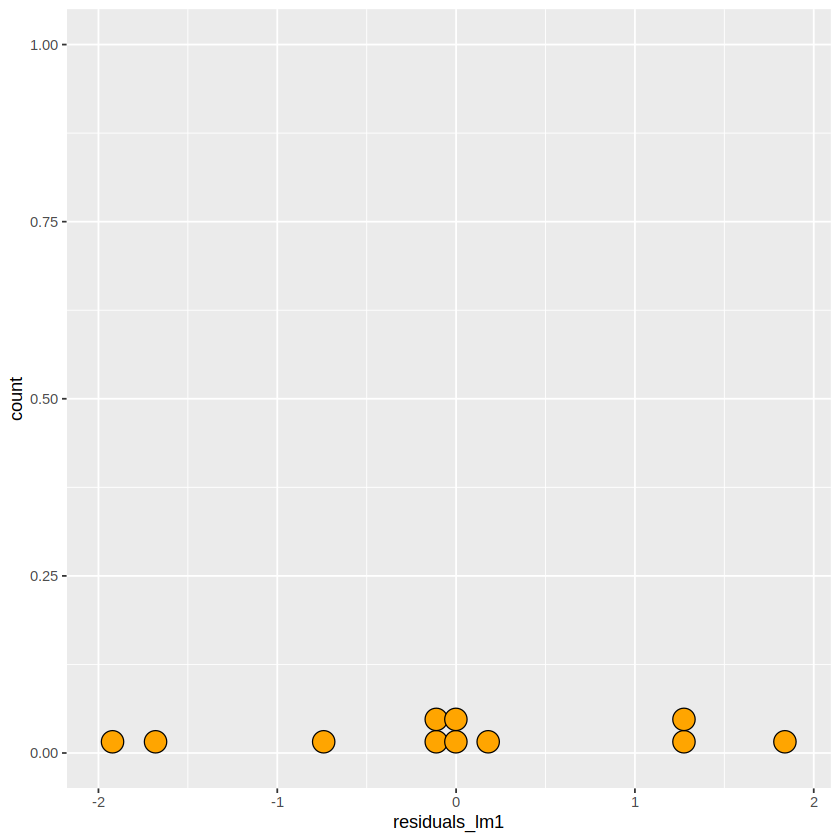

In [45]:
anscombe$residuals_lm1 <- lm1$residuals
ggplot(anscombe, aes(x = residuals_lm1)) + geom_dotplot(fill
="orange")

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


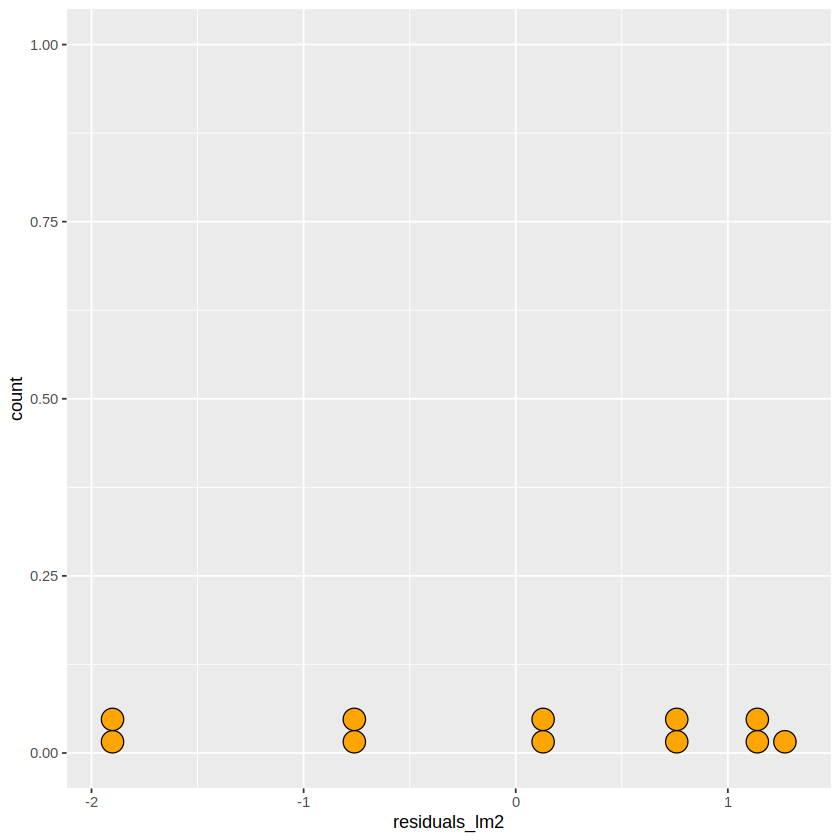

In [47]:
anscombe$residuals_lm2 <- lm2$residuals
ggplot(anscombe, aes(x = residuals_lm2)) + geom_dotplot(fill
="orange")

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


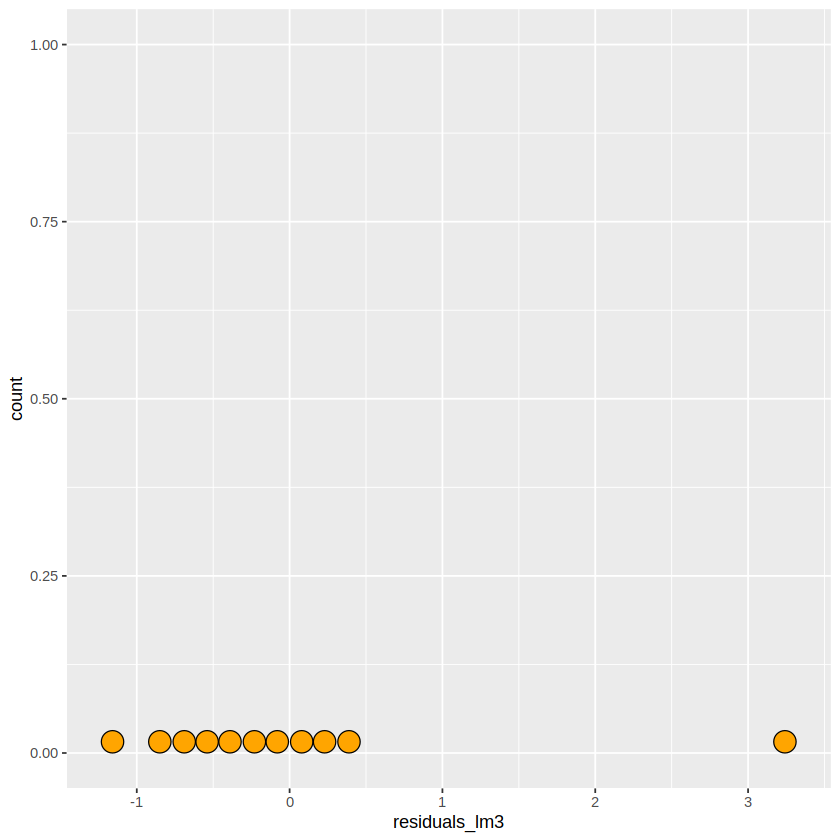

In [48]:
anscombe$residuals_lm3 <- lm3$residuals
ggplot(anscombe, aes(x = residuals_lm3)) + geom_dotplot(fill
="orange")

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


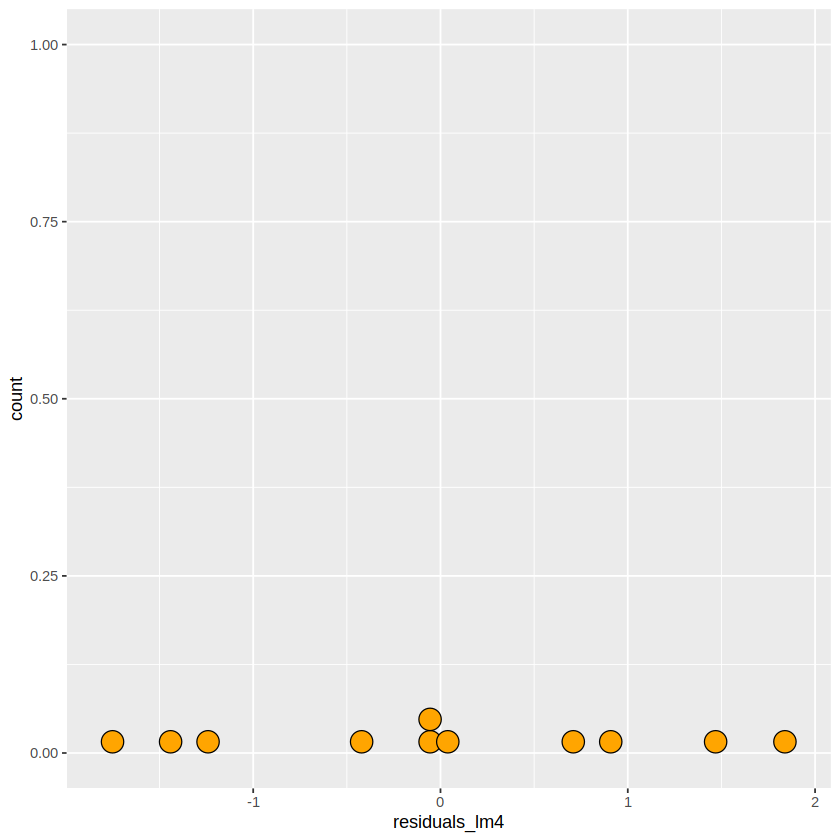

In [51]:
anscombe$residuals_lm4 <- lm4$residuals
ggplot(anscombe, aes(x = residuals_lm4)) + geom_dotplot(fill
="orange")

Оцінювати візуально розподіл даних для 11 точок досить
тяжко,
найбільше
відповідають
нормальному
розподілу
перший та третій набори даних.
Для оцінки нормальності розподілу, будемо використовувати
функції qqnorm та qqline. Бібліотека ggplot2 для цього аналізу
менш зручна. Графіки для наших наборів будуть виглядати так:

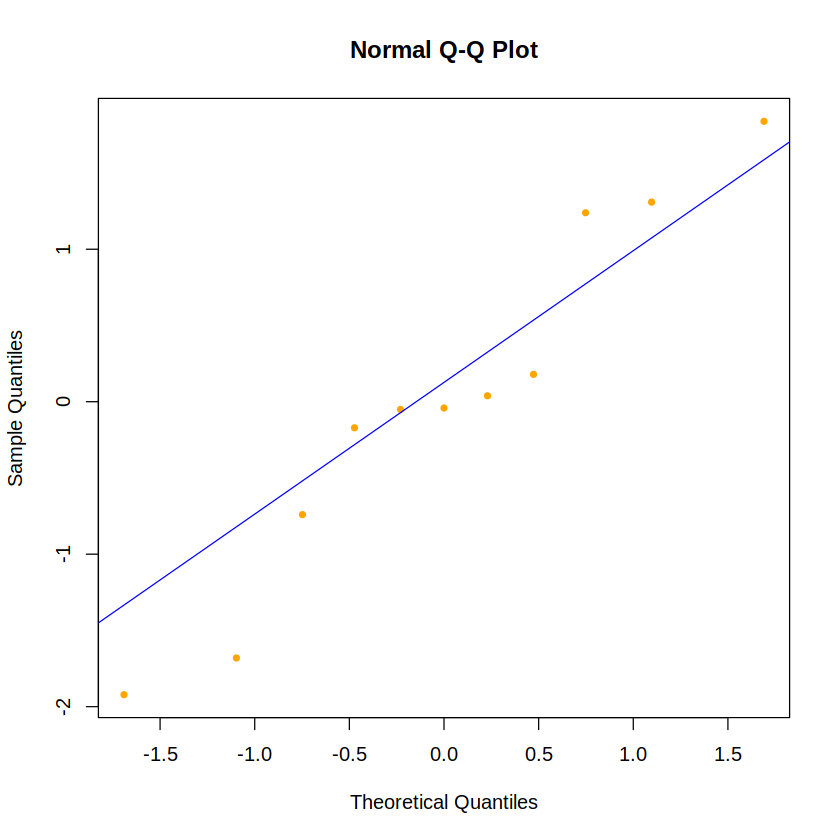

In [54]:
qqnorm(lm1$residuals, col="orange", pch=20)
qqline(lm1$residuals, col = "blue")

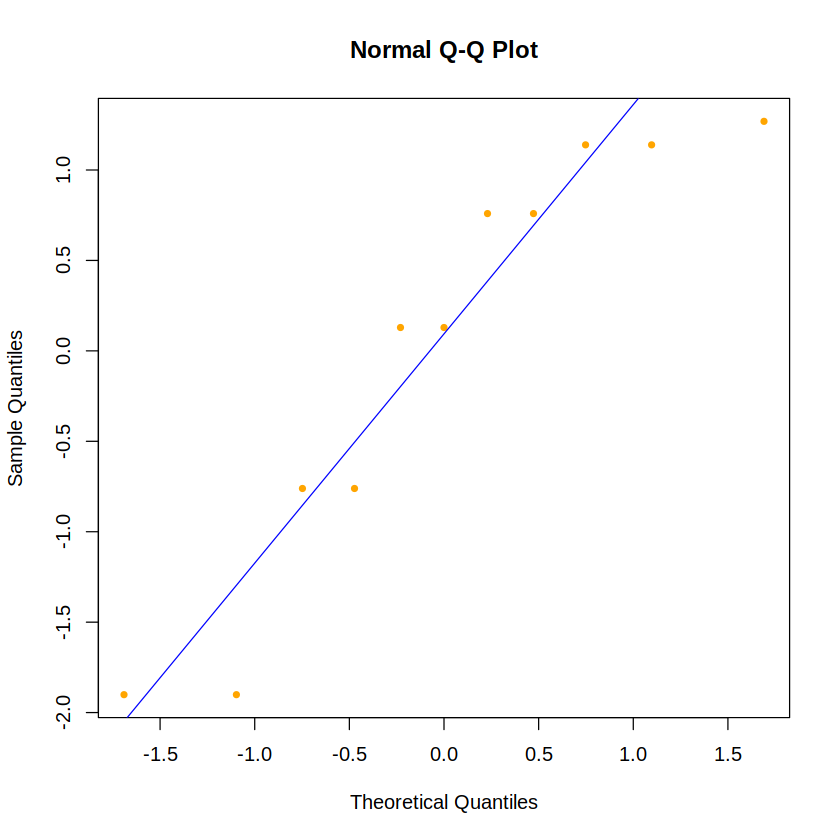

In [56]:
qqnorm(lm2$residuals, col="orange", pch=20)
qqline(lm2$residuals, col = "blue")

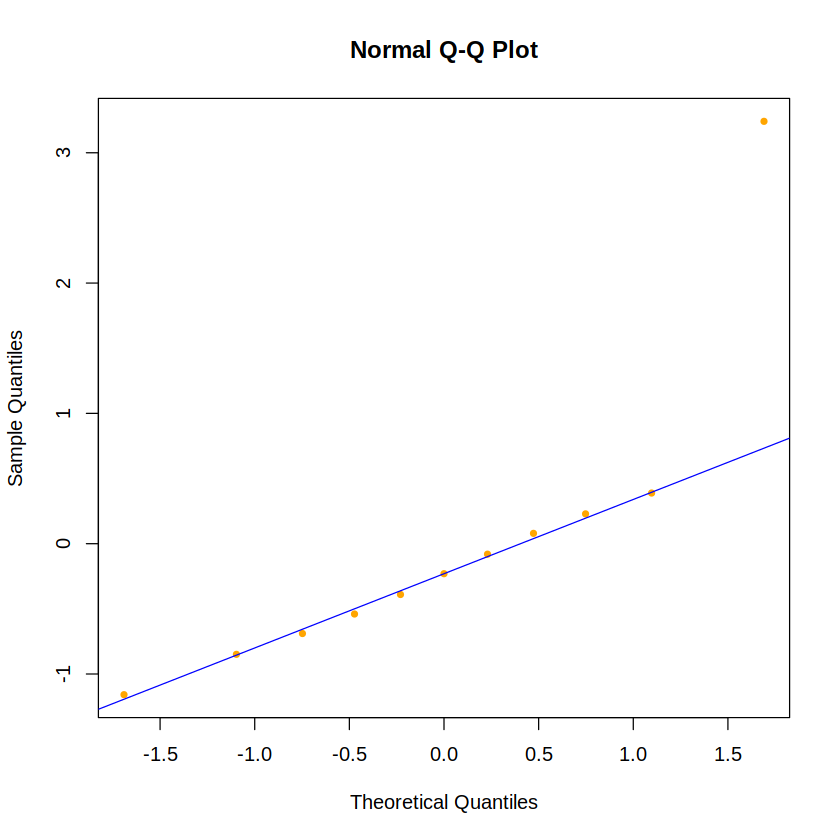

In [58]:
qqnorm(lm3$residuals, col="orange", pch=20)
qqline(lm3$residuals, col = "blue")

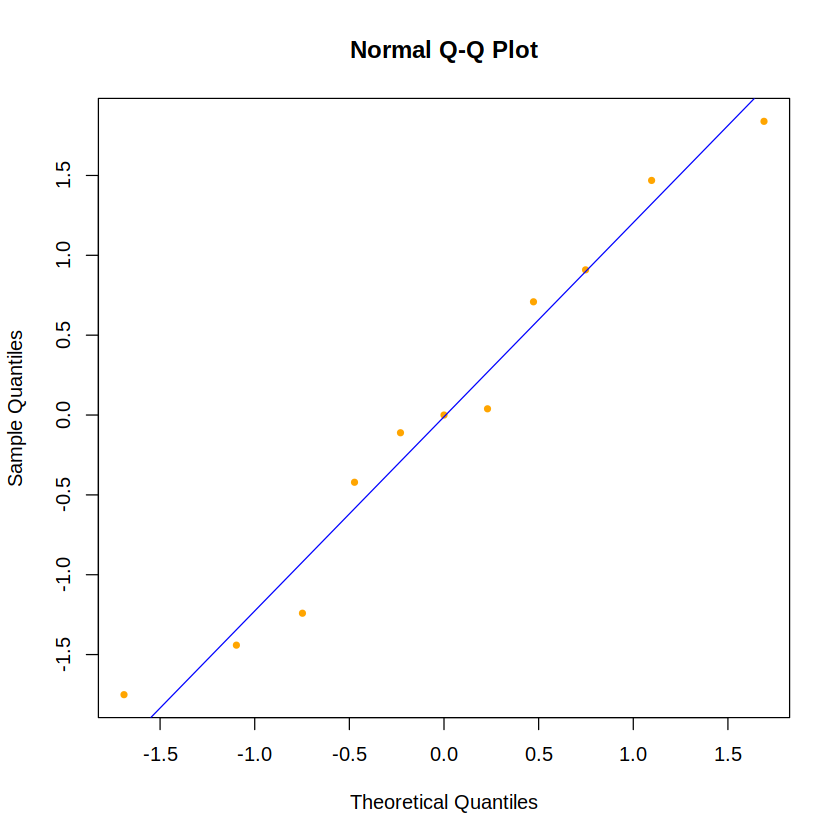

In [60]:
qqnorm(lm4$residuals, col="orange", pch=20)
qqline(lm4$residuals, col = "blue")

Оцінюємо варіативність залишків:

In [63]:
anscombe$fitted_lm1 <- lm1$fitted.values 

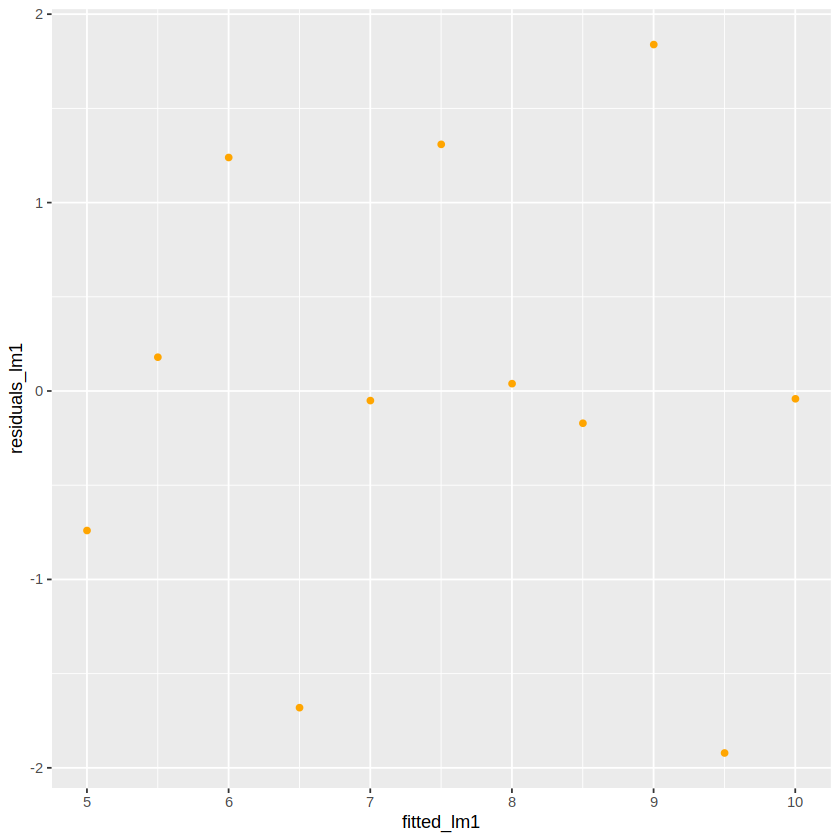

In [65]:
#Для (x1, y1) умова сталості залишків виконується.
ggplot(data=anscombe, aes(x=fitted_lm1, y=residuals_lm1)) +
 geom_point(col="orange")

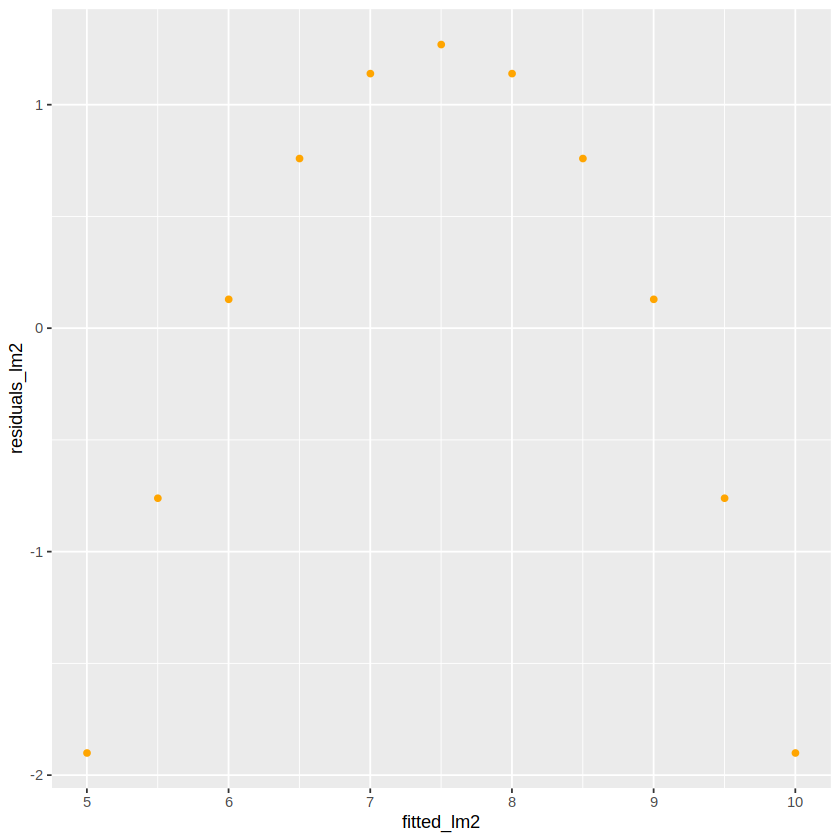

In [66]:
#Для (x2, y2) умова сталості залишків не виконується.
anscombe$fitted_lm2 <- lm2$fitted.values 
ggplot(data=anscombe, aes(x=fitted_lm2, y=residuals_lm2)) +
 geom_point(col="orange")

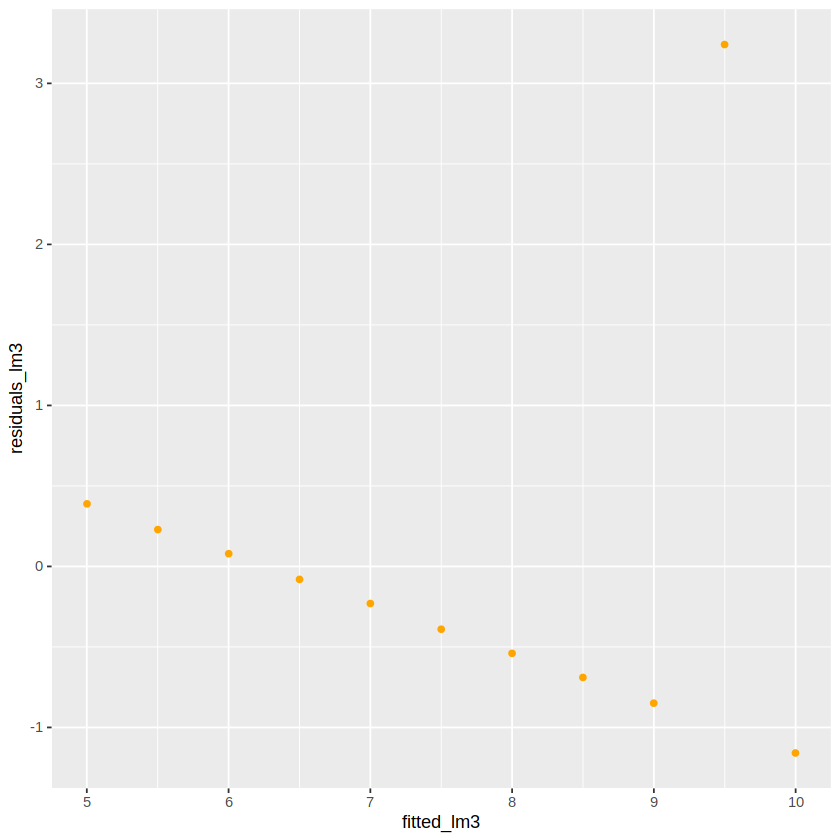

In [68]:
#Для (x3, y3) умова сталості залишків не виконується.
anscombe$fitted_lm3 <- lm3$fitted.values 
ggplot(data=anscombe, aes(x=fitted_lm3, y=residuals_lm3)) +
 geom_point(col="orange")

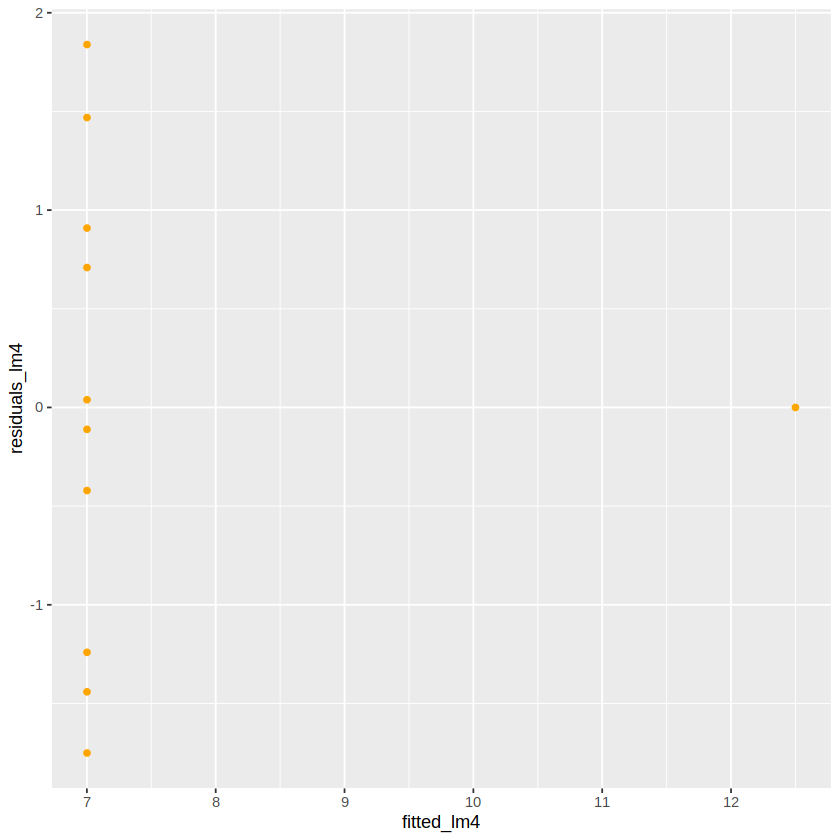

In [70]:
#Для (x4, y4) умова сталості залишків не виконується.
anscombe$fitted_lm4 <- lm4$fitted.values 
ggplot(data=anscombe, aes(x=fitted_lm4, y=residuals_lm4)) +
 geom_point(col="orange")

На основі проведених досліджень, можемо стверджувати, що
для
умови
для
побудови
моделі
лінійної
залежності
виконуються лише для набору (x1, y1).
Нагадую, що умовами для побудови валідної моделі є:
•Лінійність
•Нормальний розподіл залишків
•Гомоскедастичність (стала варіативність залишків)

Перейдемо до реального набору даних diamonds, який має
інформацію про ціну та характеристики 53940 діамантів. Це
вбудований набір даних бібліотеки ggplot2

In [84]:
str(diamonds) # Подивимось на структуру набору даних:

tibble [53,940 × 10] (S3: tbl_df/tbl/data.frame)
 $ carat  : num [1:53940] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num [1:53940] 61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num [1:53940] 55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num [1:53940] 3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num [1:53940] 3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num [1:53940] 2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


Будемо досліджувати залежність між вагою (змінна carat) та ціною (змінна price).
Побудуємо графік розсіювання для цих змінних:

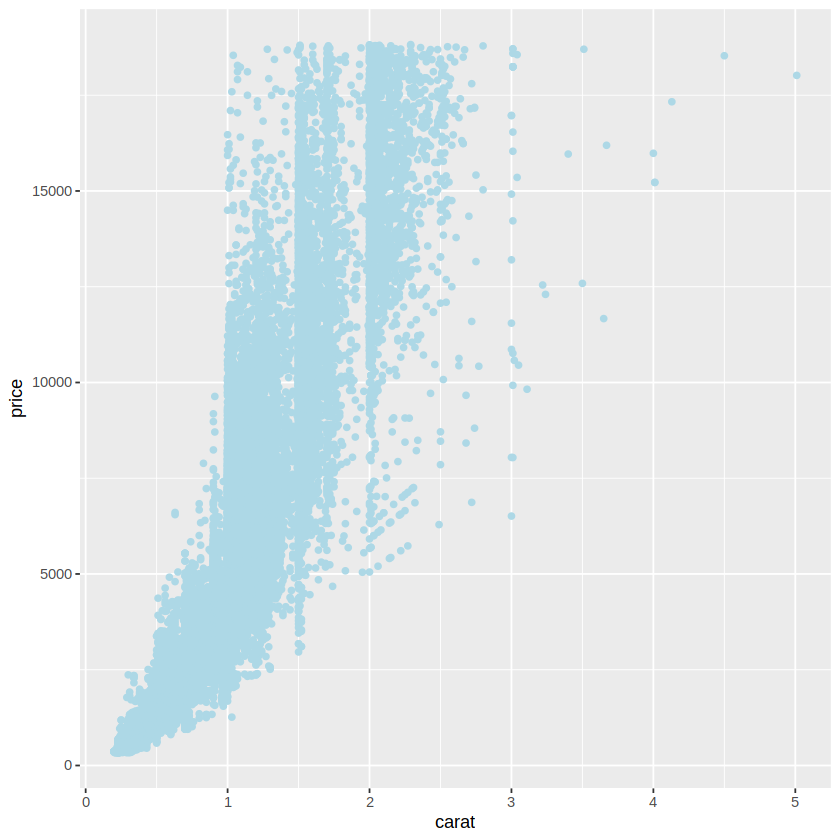

In [87]:
ggplot(data=diamonds, aes(x=carat, y=price)) +
 geom_point(col="lightblue")

In [89]:
cor(diamonds$carat, diamonds$price) # Коефіцієнт кореляції

[1] 0.9215913

Давайте подивимось, як розподілені вага та ціна в залежності
від ступеня обробки діамантів:

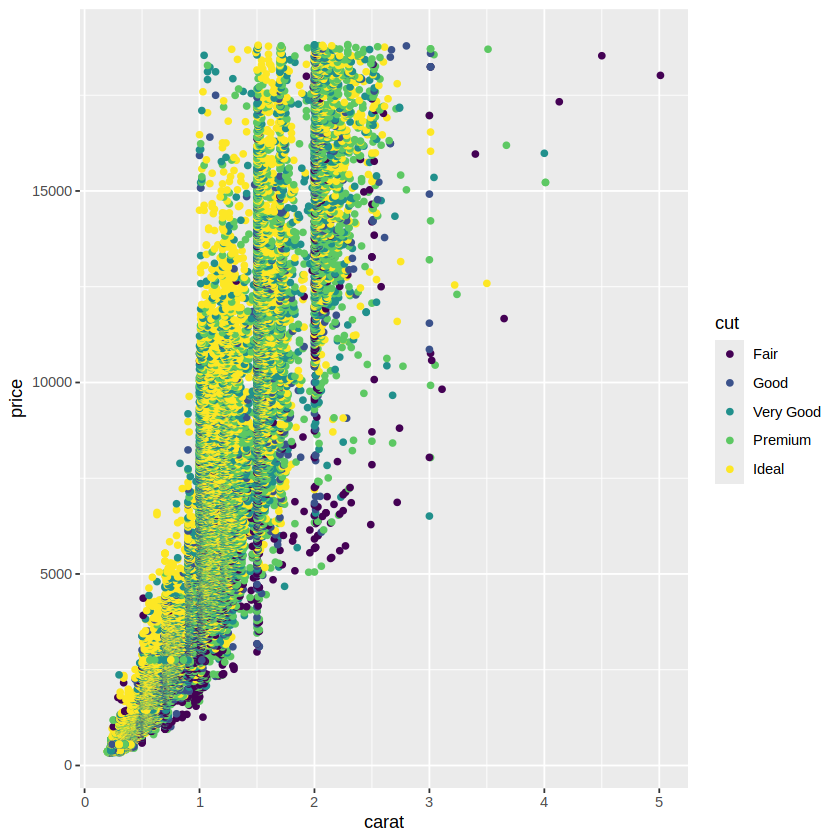

In [92]:
ggplot(data=diamonds, aes(x=carat, y=price, col=cut)) +
 geom_point()

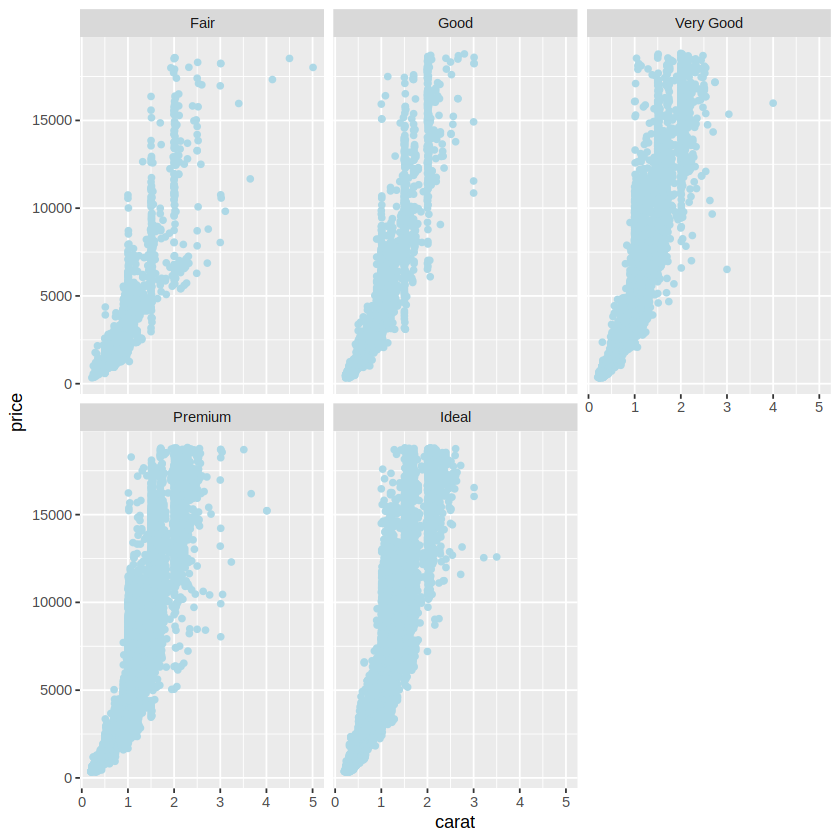

In [94]:
# Інший тип відображення:
ggplot(data=diamonds, aes(x=carat, y=price)) +
 geom_point(col="lightblue") +
 facet_wrap(~cut)

Додамо до графіка ще лінію лінійної регресії:

`geom_smooth()` using formula = 'y ~ x'


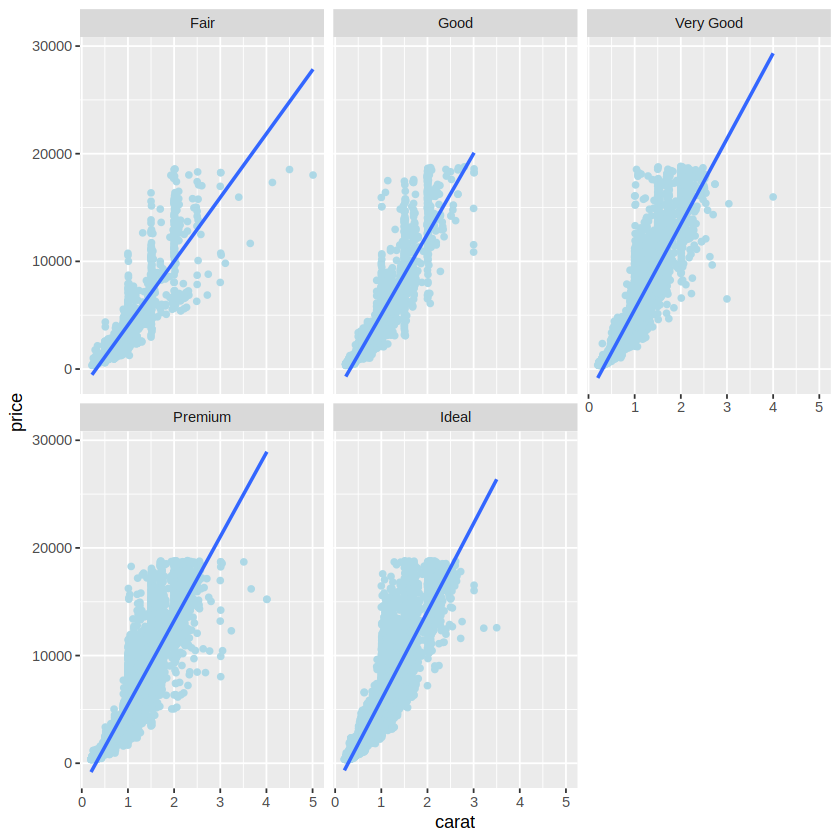

In [97]:
ggplot(data=diamonds, aes(x=carat, y=price)) +
 geom_point(col="lightblue") +
 geom_smooth(method="lm", se=FALSE) +
 facet_wrap(~cut)

In [99]:
# Вибір даних для діамантів з огранюванням Ideal та Fair
diamonds_ideal <- diamonds %>% filter(cut == "Ideal")
diamonds_fair <- diamonds %>% filter(cut == "Fair")

In [101]:
# Побудова моделей лінійної регресії
lin.diamond.ideal <- lm(price ~ carat, data = diamonds_ideal)
lin.diamond.fair <- lm(price ~ carat, data = diamonds_fair)

In [103]:
# Перегляд моделей
summary(lin.diamond.ideal)
summary(lin.diamond.fair)


Call:
lm(formula = price ~ carat, data = diamonds_ideal)

Residuals:
     Min       1Q   Median       3Q      Max 
-13786.0   -685.2      4.3    492.7  11452.2 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2300.37      18.04  -127.5   <2e-16 ***
carat        8192.39      21.85   374.9   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1388 on 21549 degrees of freedom
Multiple R-squared:  0.8671,	Adjusted R-squared:  0.8671 
F-statistic: 1.406e+05 on 1 and 21549 DF,  p-value: < 2.2e-16



Call:
lm(formula = price ~ carat, data = diamonds_fair)

Residuals:
    Min      1Q  Median      3Q     Max 
-9824.6  -698.3  -100.4   563.9  9316.3 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1839.07     102.59  -17.93   <2e-16 ***
carat        5924.50      87.94   67.37   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1822 on 1608 degrees of freedom
Multiple R-squared:  0.7384,	Adjusted R-squared:  0.7382 
F-statistic:  4539 on 1 and 1608 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


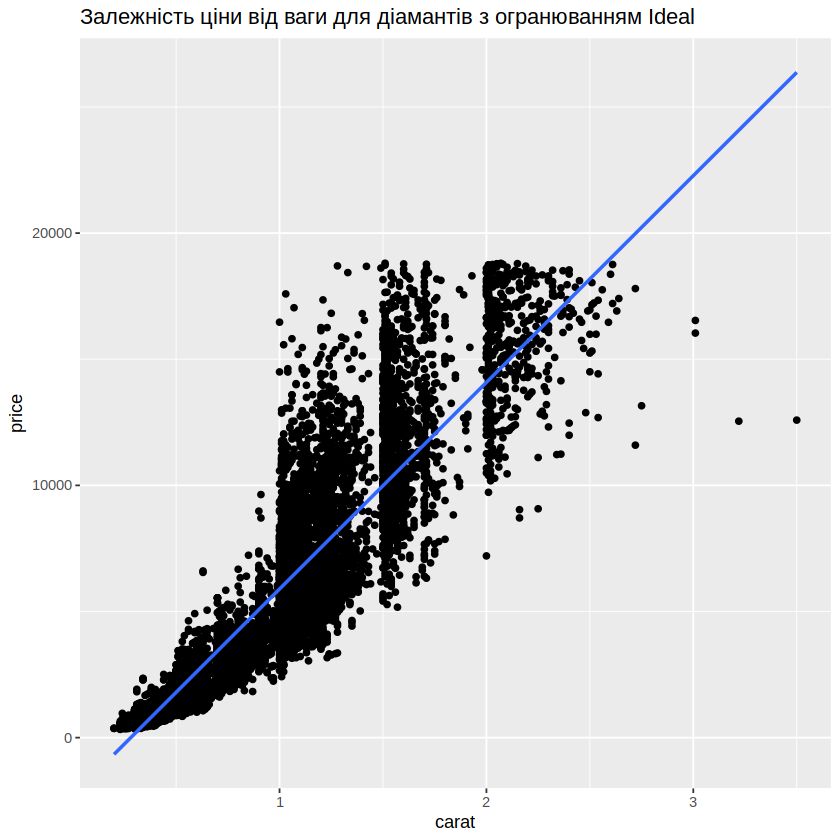

In [105]:
# Візуалізація для діамантів з огранюванням Ideal
ggplot(diamonds_ideal, aes(x = carat, y = price)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Залежність ціни від ваги для діамантів з огранюванням Ideal")

`geom_smooth()` using formula = 'y ~ x'


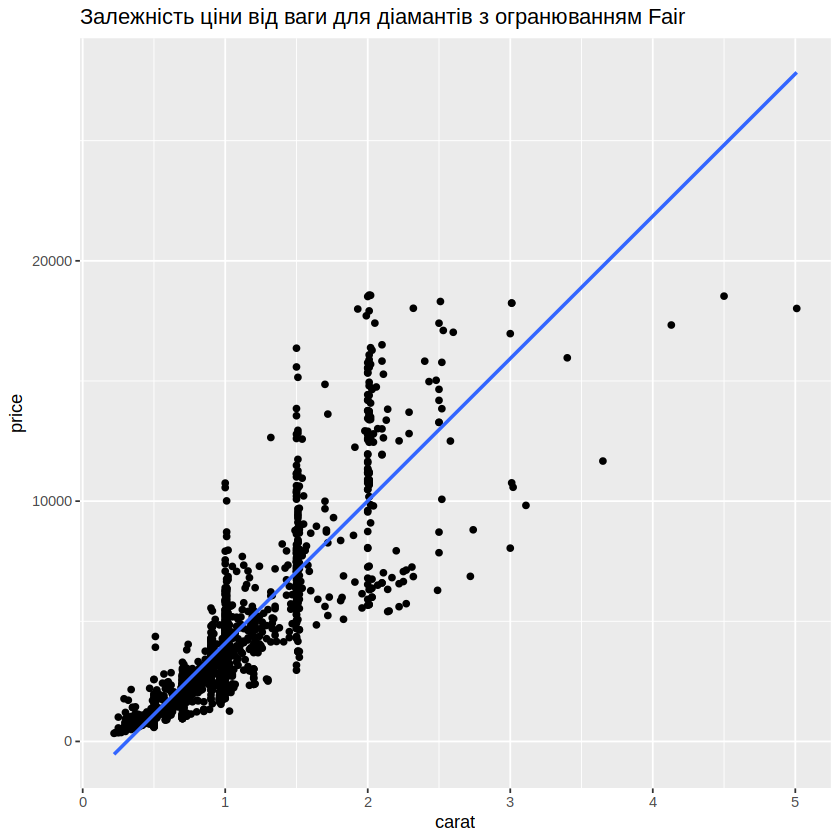

In [111]:
# Візуалізація для діамантів з огранюванням Fair
ggplot(diamonds_fair, aes(x = carat, y = price)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Залежність ціни від ваги для діамантів з огранюванням Fair")

In [117]:
predict(lin.diamond.ideal, newdata = data.frame(carat = 1)) # Якою буде ціна ідеально (cut = Ideal) обробленого діаманта вагою 1 карат згідно моделі lin.diamond.ideal?

1 
5892.018

In [119]:
predict(lin.diamond.fair, newdata = data.frame(carat = 1)) # Якою буде ціна прийнятно (cut = Fair) обробленого діаманта вагою 1 карат згідно моделі lin.diamond.fair?

1 
4085.421